      X     -Y    Ni
0   3.0  1.042  24.0
1   6.0  1.516  32.0
2   7.0  2.037  27.0
3  10.0  2.457  23.0
4  13.0  3.409  33.0
5  15.0  3.800  20.0
6  17.0  4.000   2.0


C:\Users\roman\AppData\Local\Temp\ipykernel_2608\95946554.py:75: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig1, ax1 = plt.subplots()


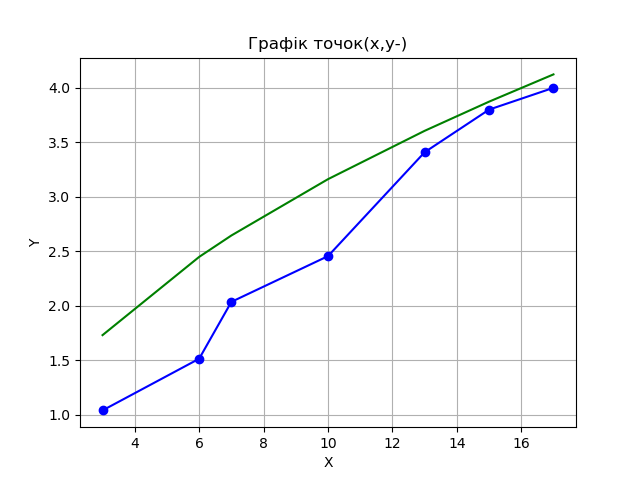

Equation system: 
 A*468.80963299902675 + 161.0*B = 381.5 
 A*1446.0 + B*468.80963299902675 = 1219.2426304286757
Знаходимо невідомі a та b
a =  1.3396668322197007 b =  -1.5313584841856307


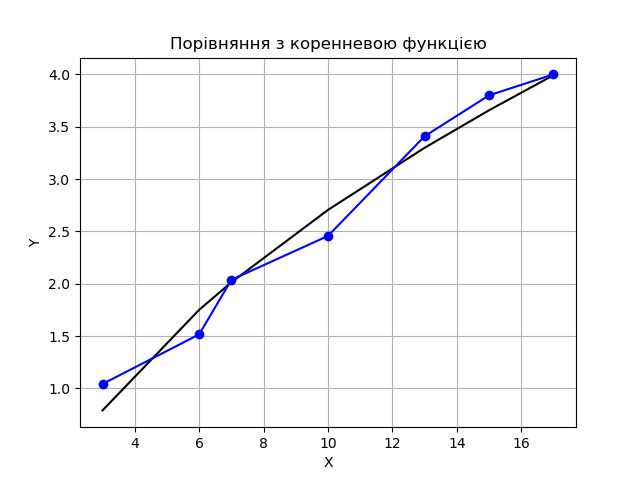

Функція 
 f=(x) 1.3396668322197007 *√х + -1.5313584841856307 
Sigma : 0.07816366026843975
Omega : 5.537071040519345


In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as mt
from scipy.optimize import fsolve
%matplotlib widget



def read_from_file(path):
    with open(path) as f:
        lines = [i.replace("\n", "") for i in f.readlines()]
        matrix = [[float(j) for j in i.split(",")] for i in lines]
    return matrix

matrix = read_from_file("Data.txt")

def get_x_i(matrix):
    return matrix[0][1:]

def get_y_i(matrix):
    return [matrix[i][0] for i in range(1, len(matrix))]

arr_x = get_x_i(matrix)

arr_y = get_y_i(matrix)





def get_n_i(matrix):
    return [sum([matrix[i][j] for i in range(1, len(matrix))]) for j in range(1, len(matrix[0]))]

def get_m_i(matrix):
    return [sum(matrix[i][1:]) for i in range(1, len(matrix))]

y_vybirkovi = []


def Y_vybirkove():
    yi = []
    for i in range(len(arr_y)+1):
        elems = []
        for j in range(len(arr_x) - 1):
            elem = matrix[j + 1][i + 1] * arr_y[j]
            elems.append(elem)
        yi.append(sum(elems))

    result = [y / get_n_i(matrix)[i] for i, y in enumerate(yi)]
    return result


Ni = get_n_i(matrix)

y_vybirkovi = Y_vybirkove()






new_y = [round(i, 3) for i in y_vybirkovi]



x_values, y_values = arr_x, y_vybirkovi
df = pd.DataFrame({'X': x_values, '-Y': new_y, 'Ni': get_n_i(matrix)})
print(df)
# Побудова графіка
# x = np.linspace(0, 5, 100)


# Обчислення значень показникової функції для кожного x
fig1, ax1 = plt.subplots()
y = np.sqrt(x_values)
yy = [i**2 for i in x_values]
ax1.plot(x_values, y_values , marker='o', linestyle='-', color='blue')
#ax1.plot(x_values,yy, color='red')
ax1.plot(x_values,y, color = 'green')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Графік точок(x,y-)')
plt.grid(True)
plt.show()




# #3) exponent corelation fx = ba^x,  a,b -?


# sum1 = sum([Ni[i] * (arr_x[i]) for i in range(len(get_n_i(matrix)))])

# sum2 = sum([Ni[i] * mt.log10(y_vybirkovi[i]) for i in range(len(get_n_i(matrix)))])

# sum3 = sum([Ni[i] * (arr_x[i])**2 for i in range(len(get_n_i(matrix)))])
# sum4 = sum([Ni[i] * (arr_x[i]) * mt.log10(y_vybirkovi[i])  for i in range(len(get_n_i(matrix)))])

n = sum(get_n_i(matrix))


# print(sum1, sum2, sum3, sum4)

# print(f'Equation system: \n lgA*{sum1} + {n}*lgB = {sum2} \n lgA*{sum3} + lgB*{sum1} = {sum4}')

# def Solve_pow():
#     lgA = np.array([[sum1, n], [sum3, sum1]])
#     lgB = np.array([sum2, sum4])


#     solution = np.linalg.solve(lgA, lgB)
#     x = solution[0]
#     y = solution[1]

#     A = 10**x
#     B = 10**y
#     return [B*A**i for i in x_values], A, B



# fx,A,B = Solve_pow()

# print(fx,A,B)
# plt.plot(x_values,fx, color='black')
# plt.plot(x_values, y_values , marker='o', linestyle='-', color='blue')
# plt.plot(x_values,yy, color='red')
# #plt.plot(x_values,y, color = 'green')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Графік точок(x,y-)')
# plt.grid(True)
# plt.show()


matrix_without_xy = matrix.copy()

matrix_without_xy = [row[1:] for row in matrix[1:]]

# for row in range(len(matrix_without_xy)):
#     for col in range(len(matrix_without_xy[0])):
#         print(matrix_without_xy[row][col], end=' ')
#     print()

# def Sigma():
#     temps = []
#     for i in range(len(matrix_without_xy)):
#         for j in range(len(matrix_without_xy[0])):
#             # print(matrix_without_xy[i][j])
#             # print((abs(arr_y[i]-fx[j]))**2)
#             temp = matrix_without_xy[i][j]*(abs(arr_y[i]-fx[j]))**2
#             temps.append(temp)
#     return sum(temps) / n

# print(Sigma())

# def Omega():
#     temps = []
#     for i in range(0,len(y_vybirkovi)):
#         print(Ni[i])
#         print(abs(y_vybirkovi[i]-fx[i])**2)
#         temp = Ni[i]*(abs(y_vybirkovi[i]-fx[i]))**2
#         temps.append(temp)

#     return sum(temps)

# print(Omega())

#----------------------------------------------------------------
#4) sqrt corelation fx = a*x**0.5+b  a,b -?


sum1_ = sum([Ni[i] * np.sqrt(arr_x[i]) for i in range(len(Ni))])
sum2_ = sum([Ni[i] * y_vybirkovi[i] for i in range(len(Ni))])
sum3_ = sum([Ni[i] * (arr_x[i]) for i in range(len(Ni))])
sum4_ = sum([Ni[i] * y_vybirkovi[i] * np.sqrt(arr_x[i]) for i in range(len(Ni))])
#print(sum1_, sum2_, sum3_, sum4_)
print(f'Equation system: \n A*{sum1_} + {n}*B = {sum2_} \n A*{sum3_} + B*{sum1_} = {sum4_}')

def Solve_pow():
    x = np.array([[sum1_, n], [sum3_, sum1_]])
    y = np.array([sum2_, sum4_])


    solution = np.linalg.solve(x, y)
    A_ = solution[0]
    B_ = solution[1]


    return  [A_*np.sqrt(i)+B_ for i in x_values], A_, B_

fx,A_,B_ = Solve_pow()
print("Знаходимо невідомі a та b")
print("a = ",A_,"b = ",B_)
fig2, ax2 = plt.subplots()
ax2.plot(x_values,fx, color='black')
ax2.plot(x_values, y_values , marker='o', linestyle='-', color='blue')
#plt.plot(x_values,yy, color='red')
#plt.plot(x_values,y, color = 'green')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Порівняння з коренневою функцією')
plt.grid(True)
plt.show()

def Sigma():
    temps = []
    for i in range(len(matrix_without_xy)):
        for j in range(len(matrix_without_xy[0])):
            # print(matrix_without_xy[i][j])
            # print((abs(arr_y[i]-fx[j]))**2)
            temp = matrix_without_xy[i][j]*(abs(arr_y[i]-fx[j]))**2
            temps.append(temp)
    return sum(temps) / n
print(f'Функція \n f=(x) {A_} *√х + {B_} ')
print("Sigma :",Sigma())

def Omega():
    temps = []
    for i in range(0,len(y_vybirkovi)):
        #print(Ni[i])
        #print(abs(y_vybirkovi[i]-fx[i])**2)
        temp = Ni[i]*(abs(y_vybirkovi[i]-fx[i]))**2
        temps.append(temp)

    return sum(temps)

print("Omega :", Omega())